# Using Pandas to analyze CSV data!

_First, let's import our libraries: csv and pandas_

In [98]:
import csv
import pandas as pd
import matplotlib

_Now, we read from our CSV. Pandas makes it really easy to load CSV data into a pandas data object_

In [99]:
data = pd.read_csv('flight_arrivals.csv')

_After reading the data from the CSV file, let's display it below--checking for accuracy:_

In [100]:
data

,Airline,arrival_type,destination,count
0,Alaska,on time,Los Angeles,497
1,Alaska,on time,Phoenix,221
2,Alaska,on time,San Diego,212
3,Alaska,on time,San Francisco,503
4,Alaska,on time,Seattle,1841
5,Alaska,delayed,Los Angeles,62
6,Alaska,delayed,Phoenix,12
7,Alaska,delayed,San Diego,20
8,Alaska,delayed,San Francisco,102
9,Alaska,delayed,Seattle,305


_Data looks good. Here, we can view the top five on time flights to their respective destinations_

In [101]:
data.sort_values(by=['count', 'arrival_type'], ascending=[False, False]).head()

,Airline,arrival_type,destination,count
11,AM West,on time,Phoenix,4840
4,Alaska,on time,Seattle,1841
10,AM West,on time,Los Angeles,694
3,Alaska,on time,San Francisco,503
0,Alaska,on time,Los Angeles,497


_We can also use pandas to display only the 'on time' flights_

In [102]:
data[data['arrival_type'] == 'on time']['count']

0      497
1      221
2      212
3      503
4     1841
10     694
11    4840
12     383
13     320
14     201
Name: count, dtype: int64

_The mean (average) value among all on time flights can be calculated using the method below:_

In [103]:
data[data['arrival_type'] == 'on time']['count'].mean()

971.2

_Below, we group by airline and arrival_type and compare the average delayed and on time flights from both airlines_

In [104]:
data.groupby(['Airline', 'arrival_type']).mean()

count
Airline arrival_type        
AM West delayed        157.4
        on time       1287.6
Alaska  delayed        100.2
        on time        654.8

_Average on time flights are a lot higher for AM West than Alaska. Let's take a look at the actual totals:_

In [89]:
n = data.groupby(['Airline', 'arrival_type']).sum()

In [90]:
n

count
Airline arrival_type       
AM West delayed         787
        on time        6438
Alaska  delayed         501
        on time        3274

In [97]:
(n.iloc[1] / n.iloc[3]) * 100

count    196.640195
dtype: float64

_On time flights from AM West are 196.64% higher than from Alaska. Wow!_
_I've included the Matplotlib library for a few visuals. Below, we can see plots of delayed and on times flights per airline._

Airline  arrival_type
AM West  delayed         AxesSubplot(0.125,0.125;0.775x0.755)
         on time         AxesSubplot(0.125,0.125;0.775x0.755)
Alaska   delayed         AxesSubplot(0.125,0.125;0.775x0.755)
         on time         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

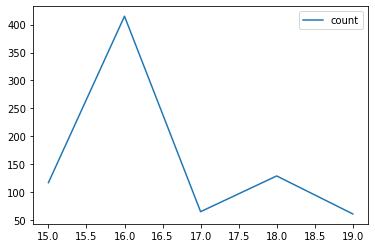

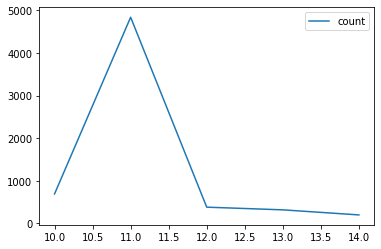

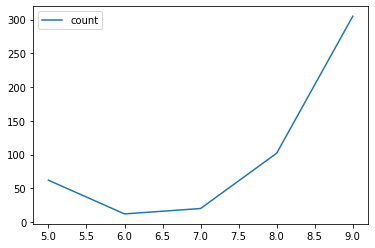

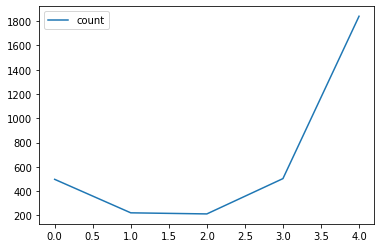

In [116]:
data.groupby(['Airline','arrival_type']).plot()

# Conclusion

_From our analyses, we have discovered that total on time flights out of AM West are 196.64% higher than those out of Alaska._
_Also, the top on time flights arrived in Phoenix, with Seattle coming in 2nd. Overall, the average on time flights out of AM West were higher than those out of Alaska. Though, Alaska's (100.2) average delayed flights were relatively close to those of AM West (157.4). Reviewing our analyses from both airlines, it is obvious that AM West has the better service; AM West has greater on time flights and comparable delays when compared to Alaska._